# IMDb reviews Sentiment Analysis

In this project we will perform a sentiment analysis and other visual analysis on the reviews of 21 Disney movies from the 1950's to the 2010's (3 movies for each decade) taken from the IMDb website.
<br> At the end we will be able to tell which decade has the highest reviewed movies based on our sample.
<br>The project is divided in four sections:
<br> **1. Web Scraping
<br> 2. Database creation
<br> 3. Analysis
<br> 4. Conclusions**


## 1. Web Scraping

We will be using the **selenium** and **BeautifulSoup** and **nltk** packages for our web scraping purposes.

<br>**1. selenium** is a powerful tool for  **browser automation**. In other words it allows users to automate browser related tasks such as searching for specific items on Chrome,  loading new pages store their content into a HTML file.
<br>**2. BeautifulSoup** is is a Python package for pulling data out of HTML files. We can use it to organize our reviews in **tabular form**

<br> After importing the main libraries we will define some functions that will allow us **to simulate what a human being would do** in order to load all the movies' reviews (21 movies x 150 reviews = 3150 reviews) into an HTML file. Thanks to *BeatifulSoup* we will be able to retrieve all the relevant data by locating the appropriate *HTML container*.

In [1]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
#Open browser controlled by selenium
def start_driver():
    chrome_options = Options()
    chrome_options.add_argument("user-data-dir=C:\\Users\\cesma\\PythonDS\\imdb\\scarico_recensioni\\selenium")
    driver = webdriver.Chrome(executable_path="C:\\Users\\cesma\\PythonDS\\imdb\\scarico_recensioni\\chromedriver.exe",
                                    options=chrome_options)
    return driver

#Load reviews
def load_reviews(driver, n):
    for i in range(n):
        print("click n.ro %d" % i)
        button = driver.find_element_by_class_name("ipl-load-more__button")
        try:
            button.click() 
        except:
            print("WARNING: missing click")
            continue #se c'è problema (no c'è click) salta quella recensione)
        time.sleep(2)

#Expand the review
def expand_spoilers(driver):
    spoilers = driver.find_elements_by_class_name("spoiler-warning__control")
    
    for pos, spoiler in enumerate(spoilers):
        try:
            spoiler.click()
            time.sleep(0.5)
        except:
            print("WARNING: problems with spoiler %d" % pos+1)

#Get movie release year
def get_year(soup):
    div_year = soup.find("span",{"class": "nobr"})
    year = div_year.text.strip()
    year = year.replace("(", "").replace(")","")
    year = int(year)
    return year

#Get name of the movie
def get_title_movie(soup):
    div_title_movie = soup.find("a", {"itemprop": "url"})
    title_movie = div_title_movie.text.strip()
    return title_movie

#Get movie review score 
def get_stars(soup):
    div_stars = soup.find("span", {"class": "rating-other-user-rating"})
    try:
        text_stars = div_stars.text.strip()
        stars = text_stars.split("/")[0]
    except:
        stars = None
    return stars

#Get movie review date
def get_date(soup):
    span_date = soup.find("span", {"class": "review-date"})
    try:
        text_date = span_date.text.strip()
        review_date = datetime.datetime.strptime(text_date, "%d %B %Y")   # 14 June 2019
        return_date = review_date.strftime("%Y-%m-%d")
    except Exception as e: 
        return_date = None
    return return_date

#Get reviewer's name 
def get_author(soup):
    span_author = soup.find("span", {"class": "display-name-link"})
    try:
        text_author = span_author.text.strip()
    except Exception as e: 
        text_author = None
    return text_author

#Get review title name
def get_title(soup):
    a_title = soup.find("a", {"class": "title"})
    try:
        text_title = a_title.text.strip()
    except:
        text_title = None
    return text_title

#Get review content
def get_review(soup):
    div_review = soup.find("div", {"class": "show-more__control"})
    try:
        text_review = div_review.text.strip()
    except:
        text_review = None
    return text_review

In [14]:
# Movies URL

URLALICE = "https://www.imdb.com/title/tt0043274/reviews?sort=submissionDate&dir=desc&ratingFilter=0" #Alice in the wonderland 1951
URLPETERPAN = "https://www.imdb.com/title/tt0046183/reviews?sort=submissionDate&dir=desc&ratingFilter=0" #Peter pan 1953
URLSB = "https://www.imdb.com/title/tt0053285/reviews/?ref_=tt_ql_urv"   #Sleeping beauty
URL101D = "https://www.imdb.com/title/tt0055254/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #One hundred and one Dalmatas 1961
URLSNR = "https://www.imdb.com/title/tt0057546/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #The Sword in the Stone 1963
URLJB = "https://www.imdb.com/title/tt0061852/reviews?sort=submissionDate&dir=desc&ratingFilter=0"    #The jungle book 1967
URLRISTOCATS = "https://www.imdb.com/title/tt0065421/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #The aristocats 1970
URLROBINHOOD = "https://www.imdb.com/title/tt0070608/reviews?sort=submissionDate&dir=desc&ratingFilter=0"    #Robin Hood 1973
URLMUPPET = "https://www.imdb.com/title/tt0079588/reviews/?ref_=tt_ql_urv"  #The Muppet Movie 1979
URLBCAULDRON = "https://www.imdb.com/title/tt0088814/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #The black Cauldron 1985
URLOLIVER = "https://www.imdb.com/title/tt0095776/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #Oliver & Company 1988
URLSIRENETTA = "https://www.imdb.com/title/tt0097757/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #The little mermaid 1989 
URLALADDIN = "https://www.imdb.com/title/tt0103639/reviews?sort=submissionDate&dir=desc&ratingFilter=0" #Aladdin  1991
URLLIONKING = "https://www.imdb.com/title/tt0110357/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #lion king 1994
URLMULAN = "https://www.imdb.com/title/tt0120762/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #Mulan 1998 
URLMONSTERS = "https://www.imdb.com/title/tt0198781/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #Monsters  2001
URLWALLE = "https://www.imdb.com/title/tt0910970/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #Wall-e 2008 
URLINCREDIBILI = "https://www.imdb.com/title/tt0317705/reviews?sort=submissionDate&dir=desc&ratingFilter=0"  #The Incredibles 2004
URLDESPICABLE = "https://www.imdb.com/title/tt1323594/reviews/?ref_=tt_ql_urv" #Despicable Me 2010 
URLBIGHERO = "https://www.imdb.com/title/tt2245084/reviews?sort=submissionDate&dir=desc&ratingFilter=0"   #Big hero 6 2014
URLDORY = "https://www.imdb.com/title/tt2277860/reviews/?ref_=tt_ql_urv"  #Finding Dory 2016

In [15]:
movies_list = [URLALICE, URLPETERPAN, URLSB, URL101D, URLSNR, URLJB, URLRISTOCATS, URLROBINHOOD, URLMUPPET, URLBCAULDRON, URLOLIVER, URLSIRENETTA, 
               URLALADDIN, URLLIONKING, URLMULAN, URLMONSTERS, URLWALLE, URLINCREDIBILI, URLDESPICABLE, URLBIGHERO, URLDORY]

In [ ]:
#Initialize browser controlled by selenium
driver = start_driver()

In [16]:
# Load reviews and store them into an HTML file

html_def = []

for url in movies_list:
    driver.get(url) #pass movie URL, selenium will open this page in the browser
    load_reviews(driver, 5) #load reviews in the page
    expand_spoilers(driver) #expand review
    html = driver.page_source
    html_def.append(html)
    print(f"Fine caricamento {url}")    

click n.ro 0
click n.ro 1
click n.ro 2
click n.ro 3
click n.ro 4
Fine caricamento https://www.imdb.com/title/tt0043274/reviews?sort=submissionDate&dir=desc&ratingFilter=0
click n.ro 0
click n.ro 1
click n.ro 2
click n.ro 3
click n.ro 4
Fine caricamento https://www.imdb.com/title/tt0046183/reviews?sort=submissionDate&dir=desc&ratingFilter=0
click n.ro 0
click n.ro 1
click n.ro 2
click n.ro 3
click n.ro 4
Fine caricamento https://www.imdb.com/title/tt0053285/reviews/?ref_=tt_ql_urv
click n.ro 0
click n.ro 1
click n.ro 2
click n.ro 3
click n.ro 4
Fine caricamento https://www.imdb.com/title/tt0055254/reviews?sort=submissionDate&dir=desc&ratingFilter=0
click n.ro 0
click n.ro 1
click n.ro 2
click n.ro 3
click n.ro 4
Fine caricamento https://www.imdb.com/title/tt0057546/reviews?sort=submissionDate&dir=desc&ratingFilter=0
click n.ro 0
click n.ro 1
click n.ro 2
click n.ro 3
click n.ro 4
Fine caricamento https://www.imdb.com/title/tt0061852/reviews?sort=submissionDate&dir=desc&ratingFilter=0
cl

In [17]:
#Locate HTML reviews containers

soup_def = []
reviews_def = []

for i in range(n_movies):
    soup = BeautifulSoup(html_def[i], "html.parser") #passo html a bs
    soup_def.append(soup)
    reviews = soup.find_all("div", {"class": "lister-item"})
    reviews_def.append(reviews)

In [18]:
#Locate HTML reviews title and release year containers

title_year_def = []

for i in range(n_movies):
    title_year = soup_def[i].find("h3", {"itemprop":"name"})
    title_year_def.append(title_year)

In [8]:
len(reviews_def[0])

189

In [19]:
# Create a list of stopwords
my_stop_words = ['.', ',', "n't", "'m", "'s", "'ll", "!", "?"]

In [20]:
# Store the content of the HTML file in a python dictionary
all_reviews_def = []

for i in range(n_movies):
    all_reviews = []
    for cnt, review in enumerate(reviews_def[i]):
        s = get_stars(review)
        if s is not None:
            s = int(s)
        
        recensione = get_review(review)
        words = word_tokenize(recensione)
        words_ns = [w.lower() for w in words if w not in stopwords.words("english") + my_stop_words]
        wordcount = len(words_ns)
        
        dct = {
            "movie_year":   get_year(title_year_def[i]),
            "title_movie":  get_title_movie(title_year_def[i]),
            "stars":        s,                      #non posso fare int(get_stars) perchè non funziona
            "data":         get_date(review), 
            "author":       get_author(review),
            "title_review": get_title(review),
            "word_count":   wordcount,
            "review":       get_review(review)}
        all_reviews.append(dct)
    all_reviews_def.append(all_reviews)

In [23]:
len(all_reviews_def[1])

135

# 2. Database creation

In this section we will store the data that we have scraped from the web in **sqlite database**.
<br> The **sqlite3** library will allow us to use the SQL language for the creation and manipulation of the database in a Python environment.

In [1]:
import sqlite3

In [2]:
# Establish connection with the sqlite db
db = sqlite3.connect("C:\\Users\\cesma\\PythonDS\\imdb\\scarico_recensioni\\recensioni.db")

In [26]:
#Create the DB

CREATE_QUERY = """
CREATE TABLE IF NOT EXISTS reviews (
    movie_year     INT,
    title_movie    TEXT,
    stars          INT,
    data           TEXT,
    author         TEXT,
    title_review   TEXT,
    word_count     INT,
    review         TEXT
    );
"""
db.execute(CREATE_QUERY)
db.commit()

In [28]:
# Insert the retrieved data in the newly created table

INSERT_QUERY = """
INSERT INTO reviews 
    (movie_year, title_movie, stars, data, author, title_review, word_count, review) 
         VALUES (%f, "%s","%s", "%s", "%s", "%s", %f, "%s");
"""
for i in range(n_movies):
    for dati in all_reviews_def[i]:
        insert_query = INSERT_QUERY % (dati["movie_year"],
                                       dati["title_movie"],
                                       dati["stars"],
                                       dati["data"],
                                       dati["author"],
                                       dati["title_review"].replace('"', "'"),
                                       dati["word_count"],
                                       dati["review"].replace('"', "'")
                                      )
        db.execute(insert_query)
db.commit()
db.close()

We will now use this database to perform our analyses

# 3. Analysis

In this section we will analyze the audience sentiment towards the selected Disney movies.
<br> After import the sqlite table as a pandas dataframe, we will divide our reviews according to their release year, obtaining 7 smaller dataframes in total. Then we will define functions to perform **lemmatization** and other graphical analyses (Wordclouds, word frequency charts etc...) that we will use in the latter part of the section. 
<br> We will be using the **pandas** and **nltk** packages for our purposes 

## 3.1 Define functions 

In [3]:
import nltk
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from PIL import Image
import numpy as np

In [4]:
# Import sqlite db as pandas dataframe
df = pd.read_sql_query("SELECT * from reviews", db)
df.head()

,movie_year,title_movie,stars,data,author,title_review,word_count,review
0,1951,Alice nel paese delle meraviglie,1,2021-08-14,sdjamieson,Possibly the most overrated Disney movie ever.,89,Disney himself said he should never have attem...
1,1951,Alice nel paese delle meraviglie,6,2021-08-10,alhazmi-82655,Average,10,"Enjoyed some scenes and was bored at many, I t..."
2,1951,Alice nel paese delle meraviglie,3,2021-07-09,matthewhuk,Noisy nonsense!,45,Never enjoyed this story as a kid and certainl...
3,1951,Alice nel paese delle meraviglie,8,2021-06-27,Shostakovich343,"A Disney Retrospective, Part 13",157,'Alice in Wonderland' is one of the most famou...
4,1951,Alice nel paese delle meraviglie,10,2021-06-11,esam05,It's my childhood,11,"I grew up watching this movie nonstop, and so ..."


In [5]:
# Divide reviews according to movie release year

df_1950 = df[(df["movie_year"] >= 1950) & (df["movie_year"] < 1960)] #per export R / Iramuteq
df_1960 = df[(df["movie_year"] >= 1960) & (df["movie_year"] < 1970)]
df_1970 = df[(df["movie_year"] >= 1970) & (df["movie_year"] < 1980)]
df_1980 = df[(df["movie_year"] >= 1980) & (df["movie_year"] < 1990)]
df_1990 = df[(df["movie_year"] >= 1990) & (df["movie_year"] < 2000)]
df_2000 = df[(df["movie_year"] >= 2000) & (df["movie_year"] < 2010)]
df_2010 = df[(df["movie_year"] >= 2010) & (df["movie_year"] < 2020)]

Now we define a function that performs lemmatization on the corpus based on the **part of speech tagging**.

In [6]:
# Substitute nltk tags with wordnet tags

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

# Lemmatization function
def ultimate_lemmatizer(sentence):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:       
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(WordNetLemmatizer().lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

In [7]:
ultimate_lemmatizer("I said that the worst things are crooked teeth and broken feet for children")

'I say that the bad thing be crook teeth and broken foot for child'

We now define some functions to perform some preliminary analyses (wordcloud and word frequency chart)

In [8]:
# List of stopwords
my_stop_words = ["n", "t", "s", "ll", "the", "get", "one", "even", "also"]

In [9]:
# Convert all the reviews of that movie decade in a single corpus (e.g. we will have all the reviews from the movies of the 90's in a single corpus)
# We do this because we want to make a comparison among decades
def make_text(dataframe):
    text = " ".join(review for review in dataframe.review)
    return text

# Lemmatize, tokenize, upper case to lower case and remove stopwords from corpus
def clean_text(text):
    text_lem = ultimate_lemmatizer(text)
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    text_tokens = tokenizer.tokenize(text_lem)
    text_lower = [w.lower() for w in text_tokens]
    text_nostopwords = " ".join([w for w in text_lower if w not in stopwords.words("english") + my_stop_words])
    return text_nostopwords

# Draw a wordcloud in Disney style
def make_wordcloud(clean_text, filename):
    mask = np.array(Image.open('C:\\Users\\cesma\\Desktop\\per_wc\\masks\\mickey.jpg'))
    font_path = 'C:\\Users\\cesma\\Desktop\\per_wc\\font\\waltograph42.otf'
    word_cloud = WordCloud(background_color = 'white', collocation_threshold = 30, max_words = 300, font_path=font_path, mask=mask).generate(clean_text)
    plt.figure(figsize = (10, 9))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('C:\\Users\\cesma\\Desktop\\Immagini\\Analisi grafiche preliminarie\\'+ filename)
    plt.show()

# Draw a bar chart to visualize the 50 most frequent words in the text 
def word_frequencies(clean_text, filename):
    clean_list = clean_text.split()
    freq = FreqDist(clean_list)

    x = []
    y = []
    for couple in freq.most_common(50):
        x.append(couple[0])
        y.append(couple[1])

    plt.figure(figsize = (16,9))
    plt.xticks(rotation = 90)
    plt.bar(x, y)
    plt.title("Frequenza delle parole per tutte le decadi", size=28,fontweight="bold")
    plt.savefig('C:\\Users\\cesma\\Desktop\\Immagini\\Analisi grafiche preliminarie\\'+ filename)
    plt.show()

## 3.2 Wordclouds and word frequency distribution charts

In [10]:
# 1950's
text_1950 = make_text(df_1950) #per export R / Iramuteq
clean_text_1950 = clean_text(text_1950) #per export R / Iramuteq
make_wordcloud(clean_text_1950, 'wc_1950.jpg')
word_frequencies(clean_text_1950, 'word_freq_1950.jpg')

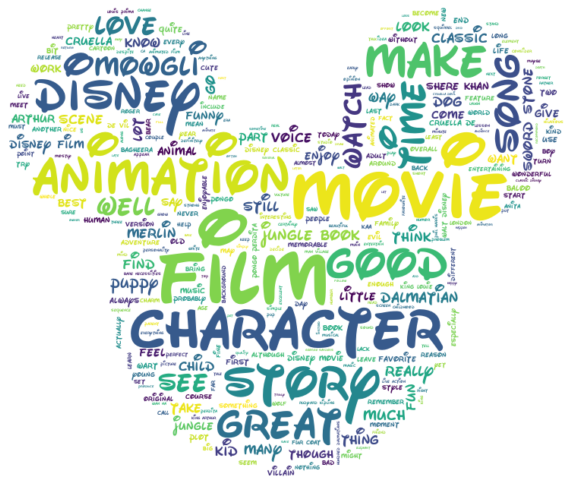

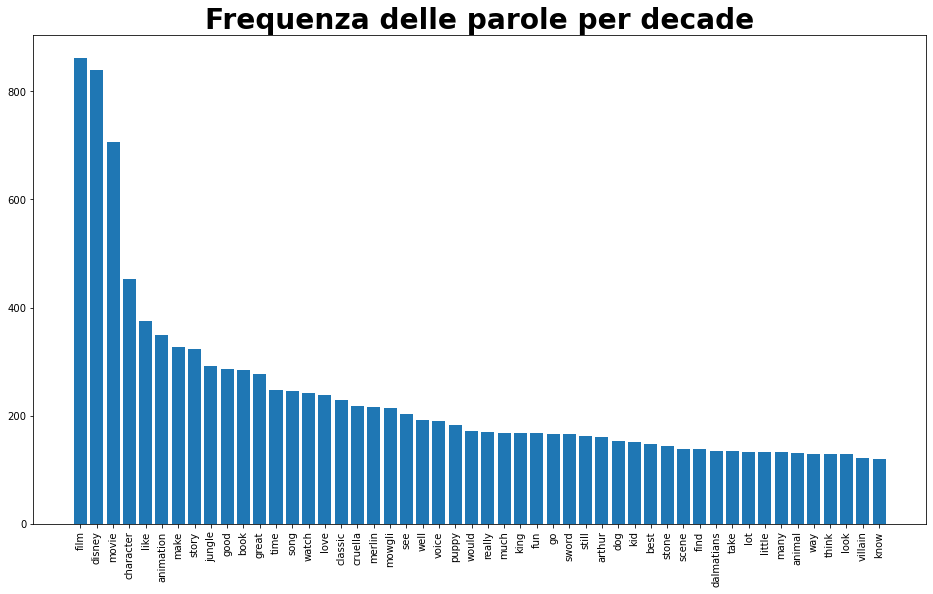

In [13]:
# 1960's
text_1960 = make_text(df_1960) #per export R / Iramuteq
clean_text_1960 = clean_text(text_1960) #per export R / Iramuteq
make_wordcloud(clean_text_1960, 'wc_1960.jpg')
word_frequencies(clean_text_1960, 'word_freq_1960.jpg')

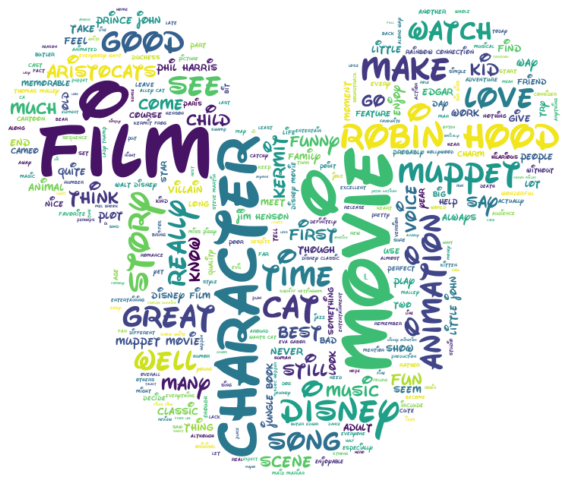

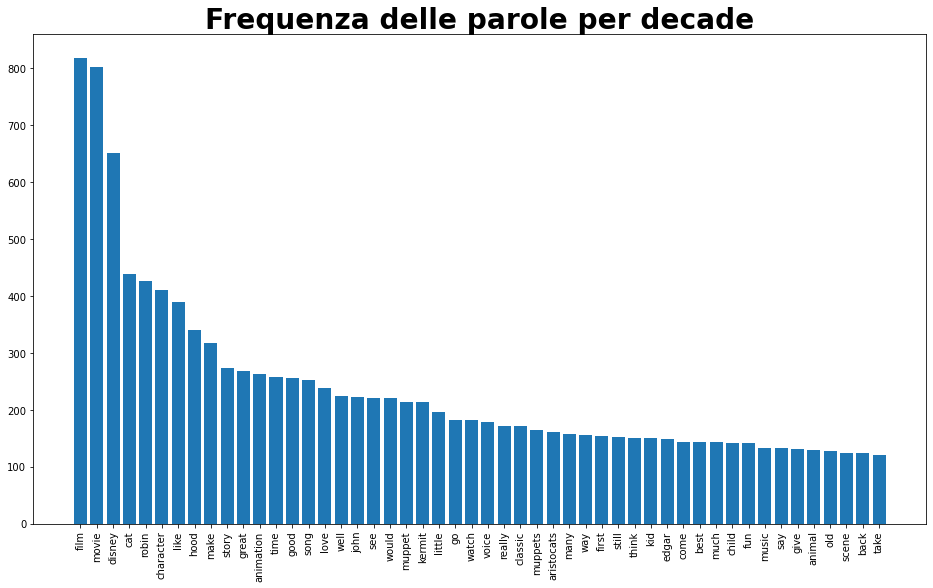

In [14]:
# 1970's
text_1970 = make_text(df_1970) #per export R / Iramuteq
clean_text_1970 = clean_text(text_1970) #per export R / Iramuteq
make_wordcloud(clean_text_1970, 'wc_1970.jpg')
word_frequencies(clean_text_1970, 'word_freq_1970.jpg')

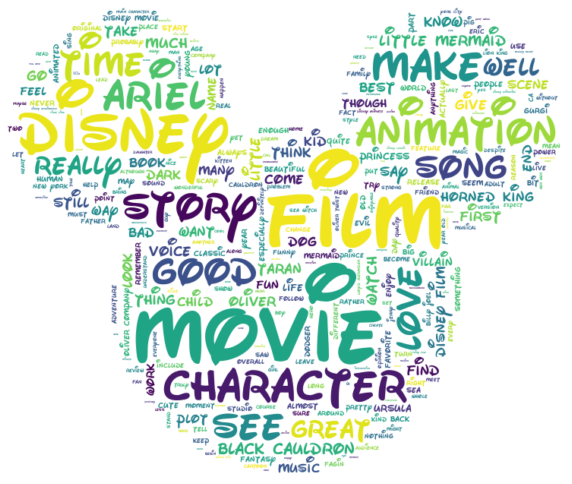

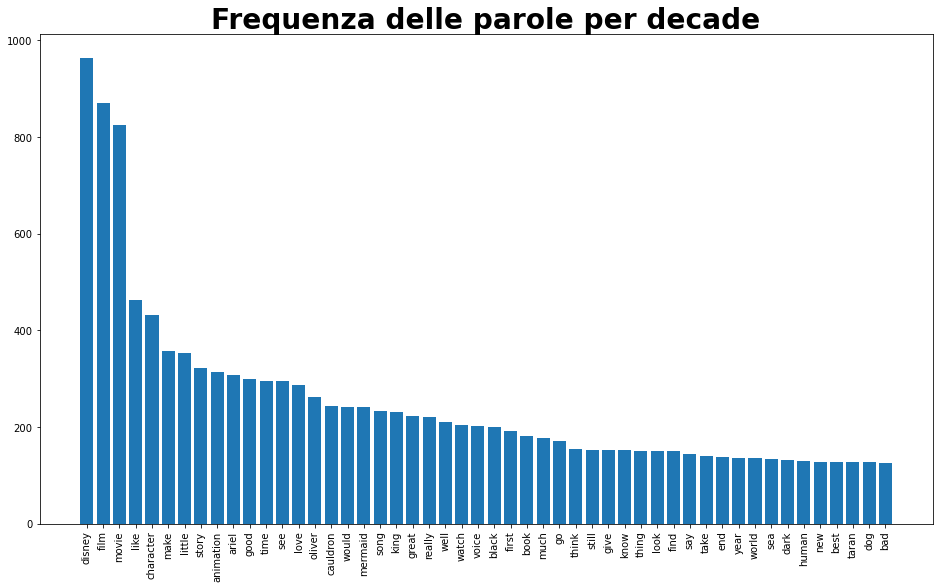

In [15]:
# 1980's
text_1980 = make_text(df_1980) #per export R / Iramuteq
clean_text_1980 = clean_text(text_1980) #per export R / Iramuteq
make_wordcloud(clean_text_1980, 'wc_1980.jpg')
word_frequencies(clean_text_1980, 'word_freq_1980.jpg')

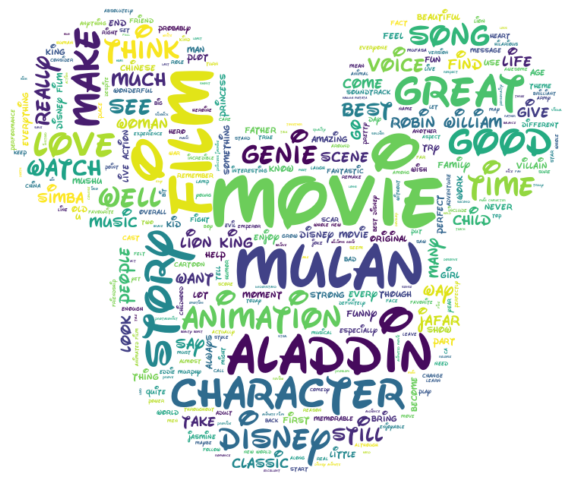

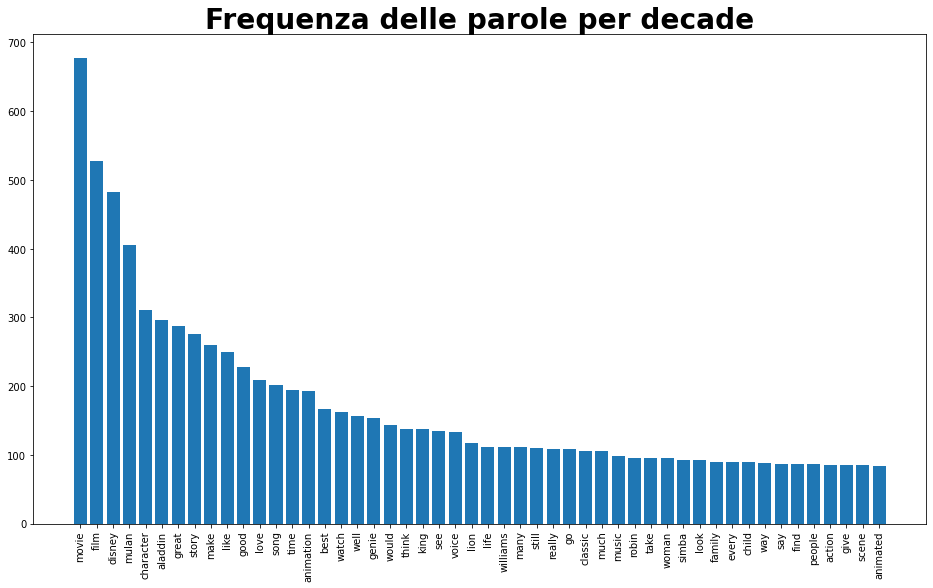

In [16]:
# 1990's
text_1990 = make_text(df_1990) #per export R / Iramuteq
clean_text_1990 = clean_text(text_1990) #per export R / Iramuteq
make_wordcloud(clean_text_1990, 'wc_1990.jpg')
word_frequencies(clean_text_1990, 'word_freq_1990.jpg')

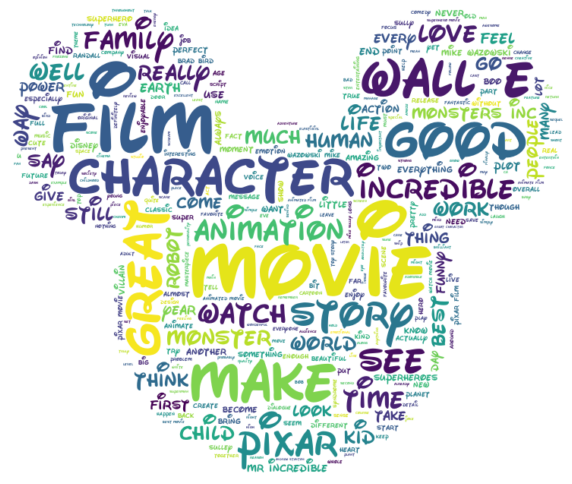

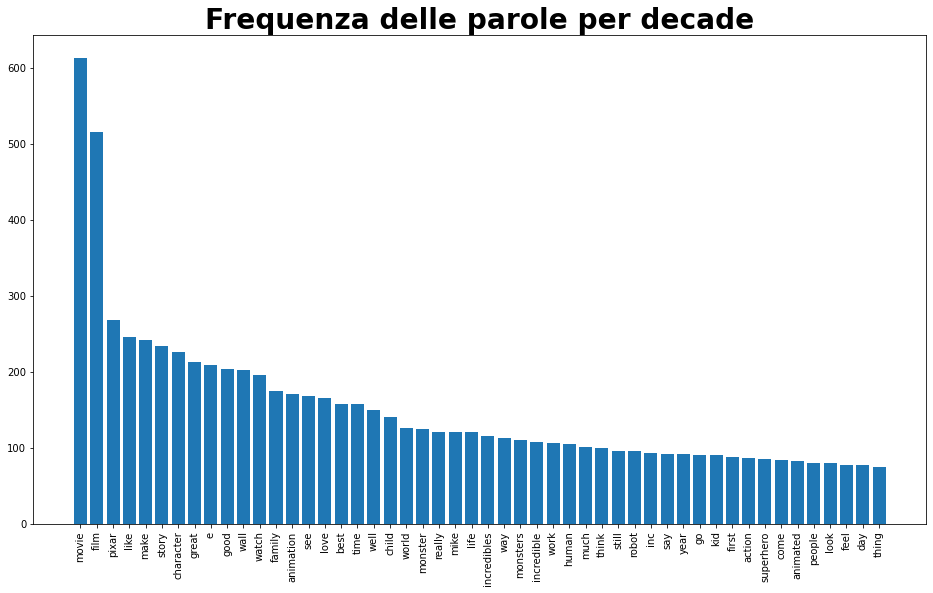

In [17]:
# 2000's
text_2000 = make_text(df_2000) #per export R / Iramuteq
clean_text_2000 = clean_text(text_2000) #per export R / Iramuteq
make_wordcloud(clean_text_2000, 'wc_2000.jpg')
word_frequencies(clean_text_2000, 'word_freq_2000.jpg')

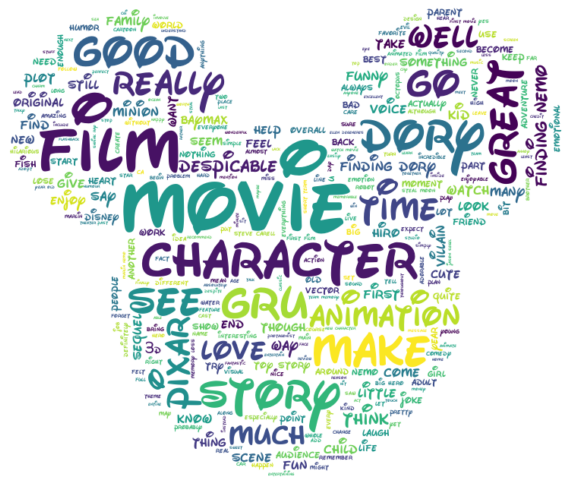

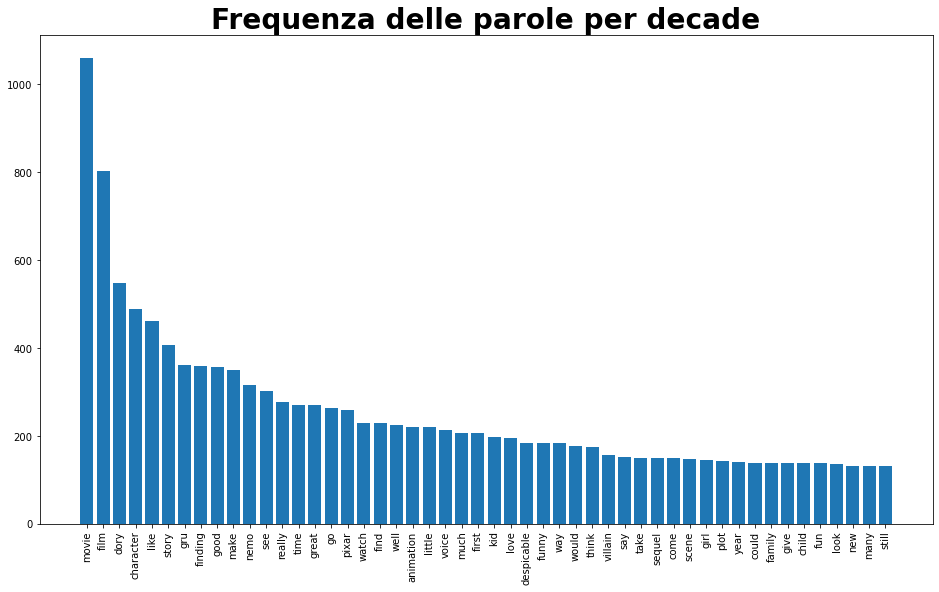

In [18]:
# 2010's
text_2010 = make_text(df_2010) #per export R / Iramuteq
clean_text_2010 = clean_text(text_2010) #per export R / Iramuteq
make_wordcloud(clean_text_2010, 'wc_2010.jpg') 
word_frequencies(clean_text_2010, 'word_freq_2010.jpg')

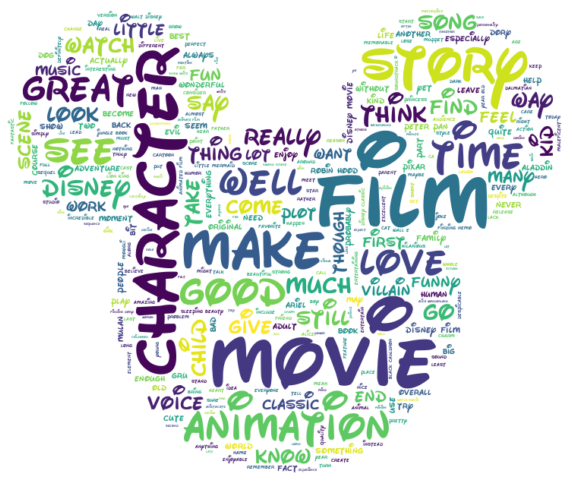

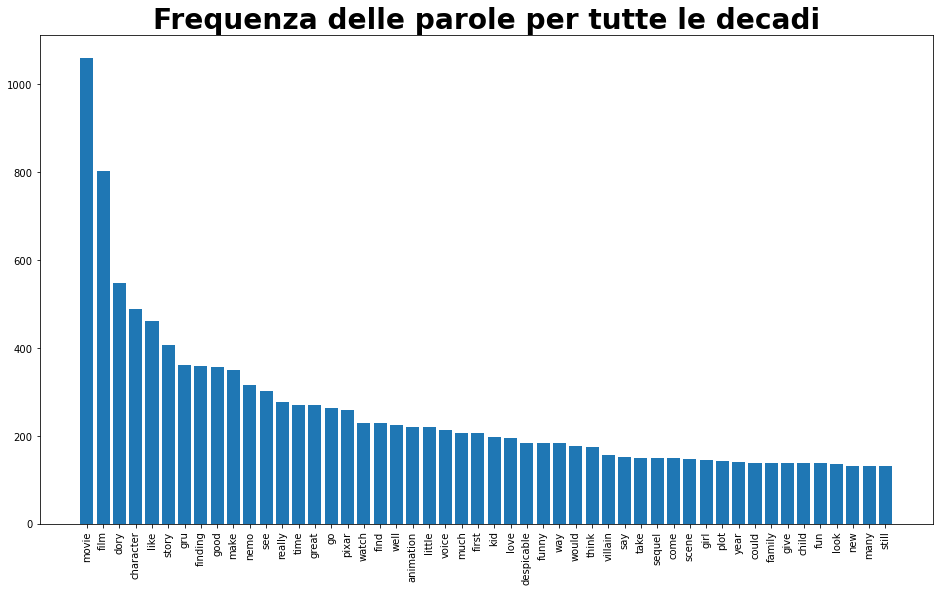

In [40]:
# ALl (generate wordclouds and word frequency bar chart for all decades)
text_overall = text_1950 + text_1960 + text_1970 + text_1980 + text_1990 + text_2000 + text_2010 #per export R / Iramuteq
clean_text_overall = clean_text_1950 + clean_text_1960 + clean_text_1970 + clean_text_1980 + clean_text_1990 + clean_text_2000 + clean_text_2010 #per export R / Iramuteq
make_wordcloud(clean_text_overall, 'wc_alldecades.jpg')
word_frequencies(clean_text_2010, 'word_freq_alldecades.jpg')

## 3.3 Average score by decade

In [20]:
df_list = [df_1950, df_1960, df_1970, df_1980, df_1990, df_2000, df_2010, df]
mean_score_list = []

for dataframe in df_list:
    stars = dataframe["stars"]
    stars_numeric = pd.to_numeric(stars, errors = 'coerce')
    mean_score = round(stars_numeric.mean(), 2)
    
    mean_score_list.append(mean_score)

In [21]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

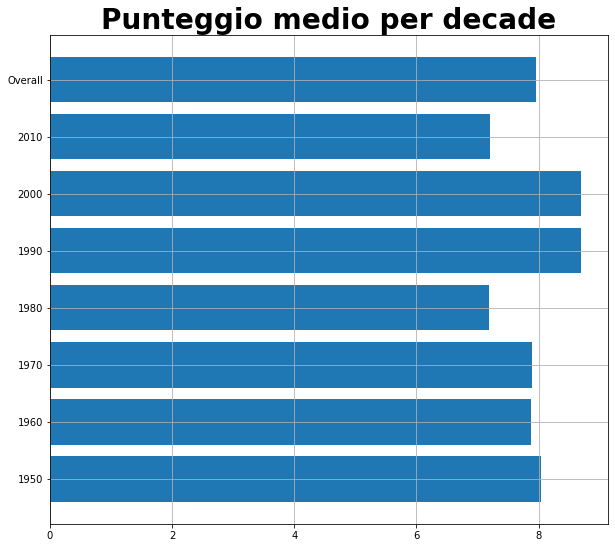

In [27]:
# Bar chart
plt.figure(figsize = (10,9))
plt.barh(years, mean_score_list, height = 8)
plt.grid(True)
plt.yticks(ticks = years, labels = [1950, 1960, 1970, 1980, 1990, 2000, 2010, "Overall"])
plt.title("Punteggio medio per decade", size=28,fontweight="bold")
plt.savefig('C:\\Users\\cesma\\Desktop\\Immagini\\Analisi grafiche preliminarie\\Punteggio medio per decade.jpg')

As we can see the decade with the highest average score are the **2000's** and the **1990's**

## 3.4 Sentiment Analysis

We will now use the _sentiment_ modulo in the nltk package to perform the sentiment analysis over the decades.
<br> The _SentimentIntensityAnalyzer_ function outputs a number between 0 (bad) and 1 (good).

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [30]:
sentiment_score_list = []
sia = SentimentIntensityAnalyzer()
clean_text_list = [clean_text_1950, clean_text_1960, clean_text_1970, clean_text_1980, clean_text_1990, clean_text_2000, clean_text_2010]

for text in clean_text_list:
    sentiment_score = sia.polarity_scores(text)["pos"] + sia.polarity_scores(text)["neu"] 
    sentiment_score_list.append(sentiment_score)

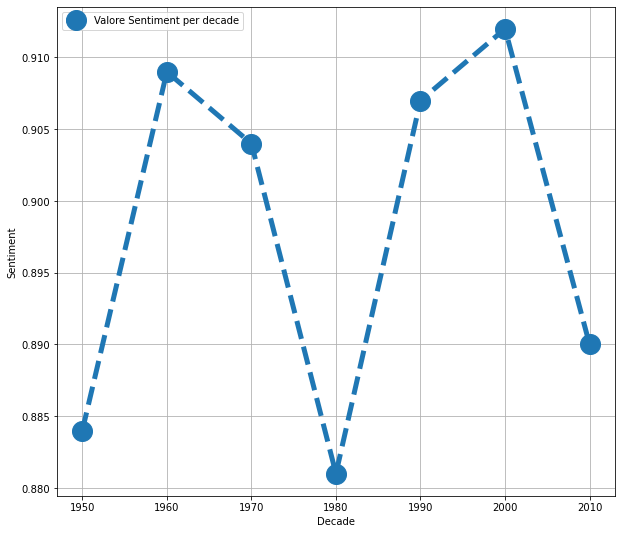

In [31]:
plt.figure(figsize = (10,9))
plt.plot(years[:-1], sentiment_score_list, linewidth=5.0, marker = 'o', markersize = '20', linestyle = '--')
plt.grid(True)
plt.ylabel('Sentiment', color = 'black')
plt.xlabel('Decade', color = 'black')
plt.legend(['Valore Sentiment per decade'], loc=2)
plt.savefig('C:\\Users\\cesma\\Desktop\\Immagini\\Analisi grafiche preliminarie\\Valore Sentiment per decade.jpg')
plt.show()

As we can see, overall the sentiment is positive for all the decades. The ones featuring the highest score are the **2000's**,
**1990's** and the **1960's**.

## 3.5 Emotion Analysis

We now investigate the predominant emotions in the corpus using the **text2emotion** package.

In [19]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cesma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cesma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cesma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
te.get_emotion(clean_text_2010)

{'Happy': 0.19, 'Angry': 0.04, 'Surprise': 0.23, 'Sad': 0.21, 'Fear': 0.32}

Text(0.5, 1.0, 'Distribuzione delle emozioni')

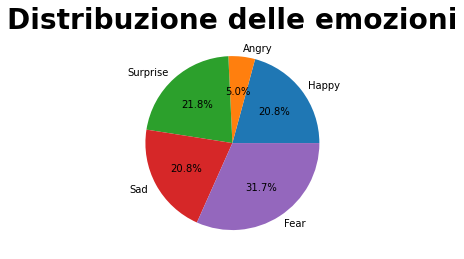

In [26]:
emotions = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
emotions_scores = [0.21, 0.05, 0.22, 0.21, 0.32]

plt.pie(emotions_scores, labels = emotions, autopct='%1.1f%%')
plt.title("Distribuzione delle emozioni", size=28,fontweight="bold")

## 3.6 Average score by number of reviews left by each user

We now investigate the relationship between the average score and the number of reviews left by each user

In [32]:
df2 = df.copy()
df2["stars"] = pd.to_numeric(df2["stars"], errors = "coerce")

In [33]:
review_count_by_author = df.groupby("author").review.count()
score_by_author = df2.groupby("author").stars.mean()
[len(review_count_by_author), len(score_by_author)]

[1846, 1846]

In [34]:
count_score = pd.merge(review_count_by_author, score_by_author, on = "author")
#count_score_filtered = count_score[count_score["review"] >= 1]

In [35]:
count_score

,review,stars
author,,
06tareq,1,9.000000
3xHCCH,1,7.000000
59Tenzin,7,NaN
851222,1,8.000000
AC4077BD,1,NaN
...,...,...
zsenorsock,1,6.000000
zshah2010,1,10.000000
zsofikam,1,8.000000


In [36]:
new_df = pd.DataFrame(count_score.groupby(by = "review").stars.mean())

In [37]:
new_df2 = new_df.reset_index()

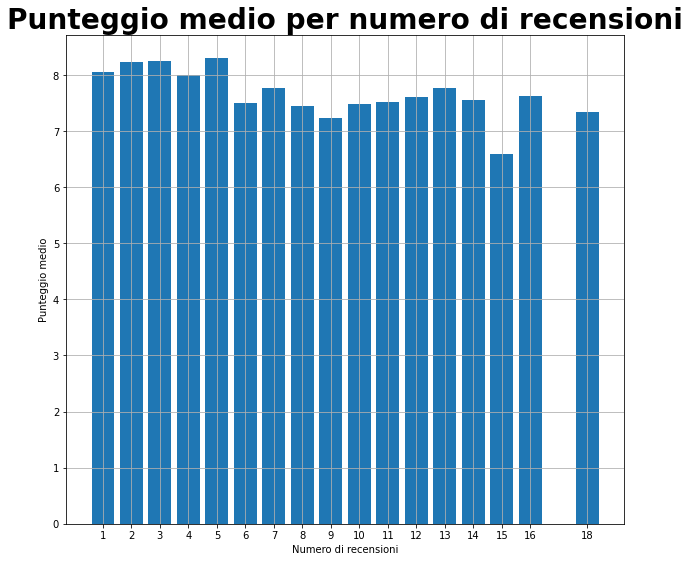

In [38]:
plt.figure(figsize = (10,9))
plt.bar(new_df2["review"], new_df2["stars"])
plt.xticks(ticks = new_df2["review"])
plt.grid(True)
plt.ylabel('Punteggio medio', color = 'black')
plt.xlabel('Numero di recensioni', color = 'black')
plt.title("Punteggio medio per numero di recensioni", size=28,fontweight="bold")
plt.savefig('C:\\Users\\cesma\\Desktop\\Immagini\\Analisi grafiche preliminarie\\Punteggio medio per numero di recensioni.jpg')

As we can see from the graph above, users who have reviewed multiple movies tend to be more strict in their judgment.